# Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy
print(eazy.__version__)

# Symlink templates & filters from the eazy-code repository
print('EAZYCODE = '+os.getenv('EAZYCODE'))

eazy.symlink_eazy_inputs()

# Increase notebook width to 100% of page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from astropy.table import Table,Column
import matplotlib.image as mpimg

0.4-11-g499410f
EAZYCODE = /Users/meghanakilli/src/eazy-py/eazy-photoz
/Users/meghanakilli/anaconda3/lib/python3.7/site-packages/eazy/data/templates -> ./templates
/Users/meghanakilli/anaconda3/lib/python3.7/site-packages/eazy/data/filters/FILTER.RES.latest -> ./FILTER.RES.latest


In [3]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

# Parameters

Default parameters are stored in the file `eazy/data/zphot.param.default` in the repository.

Parameter that differ from defaults can be provided in a dictionary as follows.

In [4]:
input_table = Table.read('/Users/meghanakilli/src/eazy-py/goodss.cat', format='ascii')
input_table

id,ra,dec,lya,z,z_spec,f_U,e_U,f_U38,e_U38,f_B,e_B,f_F435W,e_F435W,f_V,e_V,f_F606Wcand,e_F606Wcand,f_F606W,e_F606W,f_R,e_R,f_Rc,e_Rc,f_F775W,e_F775W,f_I,e_I,f_F814Wcand,e_F814Wcand,f_F850LP,e_F850LP,f_F125W,e_F125W,f_J,e_J,f_tenisJ,e_tenisJ,f_H,e_H,f_F140W,e_F140W,f_F160W,e_F160W,f_tenisK,e_tenisK,f_Ks,e_Ks,f_IRAC1,e_IRAC1,f_IRAC2,e_IRAC2,f_IRAC3,e_IRAC3,f_IRAC4,e_IRAC4,f_IA427,e_IA427,f_IA445,e_IA445,f_IA505,e_IA505,f_IA550,e_IA550,f_IA574,e_IA574,f_IA598,e_IA598,f_IA624,e_IA624,f_IA651,e_IA651,f_IA679,e_IA679,f_IA738,e_IA738,f_IA767,e_IA767,f_IA797,e_IA797,f_IA856,e_IA856
str7,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
s_17357,53.174381,-27.867349,y,3.609999895095825,3.615,0.005628,0.01357,0.070206,0.104972,3.635643,0.033092,2.345295,0.023004,6.501968,0.046852,9.203751,0.04043,8.345781,0.019106,11.6197,0.019877,10.519289,0.049298,12.43528,0.031926,11.487125,0.273581,14.162629,0.023166,13.055955,0.044168,21.368837,0.077262,18.598178,0.192764,23.461425,0.200928,28.014605,0.316655,21.294565,0.115821,25.388443,0.172747,37.087893,0.331717,33.666624,0.361438,33.833436,0.344843,35.728554,0.416095,37.16855,0.857018,48.466827,0.838846,1.74815,0.145429,5.52592,0.110682,5.181855,0.107473,10.663584,0.089226,12.587996,0.1232,14.642495,0.059854,13.26698,0.059308,14.465395,0.046245,14.872674,0.0609,18.531046,0.068461,15.967352,0.18184,15.723064,0.223351,18.476696,0.244488
s_21181,53.124366,-27.851628,y,3.700000047683716,3.685,-0.008938,0.012717,0.050231,0.102938,0.280667,0.032123,0.121185,0.023821,0.962287,0.046254,1.046701,0.023797,1.026447,0.021082,1.021999,0.020676,1.340049,0.049216,1.705693,0.033858,1.291806,0.239524,1.723918,0.020888,1.631849,0.047236,2.476392,0.06394,1.549783,0.16653,2.496924,0.202919,4.68927,0.29172,3.173883,0.11397,3.88866,0.062968,12.623427,0.31595,11.359009,0.250301,15.44821,0.203558,17.295337,0.237399,11.132001,4.259113,26.986206,5.210125,-0.215342,0.146547,-0.058063,0.111809,0.29327,0.113064,0.204636,0.080044,3.81822,0.12457,0.916679,0.052939,0.554403,0.057498,0.885657,0.046785,0.769064,0.064812,2.609681,0.072335,1.448651,0.162674,0.805084,0.192104,1.271445,0.277148
s_12390,53.078812,-27.884096,y,5.567999839782715,5.55,0.005735,0.011339,0.008688,0.108996,0.011497,0.032013,-0.028873,0.02055,-0.020276,0.041519,-99.0,-99.0,0.085956,0.018384,0.116425,0.019999,0.082724,0.042969,0.904535,0.030712,2.117087,0.275715,1.097931,0.016237,1.661639,0.043266,1.763575,0.088801,1.581815,0.171758,1.626093,0.174509,1.898172,0.270268,2.05437,0.113473,1.637387,0.067025,2.039525,0.271042,2.679349,0.308015,8.116627,0.180798,8.870267,0.201839,4.09714,0.906917,4.676676,0.802775,0.16448,0.130902,-0.044339,0.100741,0.10441,0.096688,-0.132155,0.087516,-0.161568,0.106183,-0.084063,0.046288,0.030735,0.053379,0.063305,0.042032,0.183489,0.04759,0.04316,0.05877,0.211863,0.157377,2.426307,0.176139,0.786728,0.248012
s_18207,53.270004,-27.861221,y,-1.0,4.873,0.081155,0.013765,0.083158,0.087319,0.283788,0.033529,-99.0,-99.0,0.278955,0.044006,-99.0,-99.0,-99.0,-99.0,0.456329,0.017106,0.540672,0.04252,-99.0,-99.0,0.86846,0.225163,0.263522,0.058471,-99.0,-99.0,0.436823,0.042813,-99.0,-99.0,0.263055,0.209006,-99.0,-99.0,0.46201,0.102962,0.374051,0.031301,0.205119,0.270569,-99.0,-99.0,1.511129,1.432146,2.384622,1.753575,-99.0,-99.0,-99.0,-99.0,0.345427,0.104523,0.50271,0.0884,0.290198,0.087137,0.70896,0.073864,0.461962,0.101937,0.414462,0.043677,0.433705,0.03710

In [4]:
# quicklook = Table.read('/Users/meghanakilli/Documents/PP/Catalogs/bestzgoodss550.fits')
# print(quicklook['z_map'].mean())
# quicklook

In [5]:
params = {}
# params['CATALOG_FILE'] = os.path.join(os.getenv('EAZYCODE'), '/Users/meghanakilli/src/eazy-py/lyasample.cat')
params['CATALOG_FILE'] = os.path.join(os.getenv('EAZYCODE'), '/Users/meghanakilli/src/eazy-py/goodss.cat')

params['MAIN_OUTPUT_FILE'] = 'goodsstest.eazypy'#'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103

params['Z_STEP'] = 0.01 #step*(1+z)
params['Z_MIN'] = 0
params['Z_MAX'] = 7

# zsp = input_table['z_spec'][0]

# params['Z_STEP'] = 0.0002
# params['Z_MIN'] = np.maximum(zsp - 10*params['Z_STEP']*(1+zsp), 0)
# params['Z_MAX'] = zsp + 10*params['Z_STEP']*(1+zsp)

params['PRIOR_ABZP'] = 25 #zeropoint
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['FIX_ZSPEC'] = True

In [6]:
translate_file = os.path.join(os.getenv('EAZYCODE'), '/Users/meghanakilli/Documents/PP/Catalogs/skelton_goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.translate')
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/meghanakilli/anaconda3/lib/python3.7/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Users/meghanakilli/src/eazy-py/goodss.cat
   >>> NOBJ = 550
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (103): ESO/vimos_u.res
f_F435W e_F435W (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_F606Wcand e_F606Wcand (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_F606W e_F606W (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_F775W e_F775W (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_F814Wcand e_F814Wcand (239): hst/ACS_update_sep07/wfc_f814w_t81.dat
f_F850LP e_F850LP (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J ( 34): ESO/isaac_j.res
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H ( 36): ESO/isaac_h.res
f_Ks e_Ks ( 37): ESO/isaac_ks.res
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_IRAC2 e_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC3 e_IRAC3 ( 2

208it [00:00, 4668.27it/s]


In [7]:
# dir(eazy.photoz)
# help(eazy.photoz)
help(self.fit_at_zbest)

Help on method fit_at_zbest in module eazy.photoz:

fit_at_zbest(zbest=None, prior=False, beta_prior=True, get_err=False, clip_wavelength=1100, fitter='nnls', selection=None, n_proc=0, par_skip=10000, **kwargs) method of eazy.photoz.PhotoZ instance
    Recompute the fit coefficients at the "best" redshift



# Now fit the whole catalog

fit_best: 0.2 s (n_proc=1,  NOBJ=550)


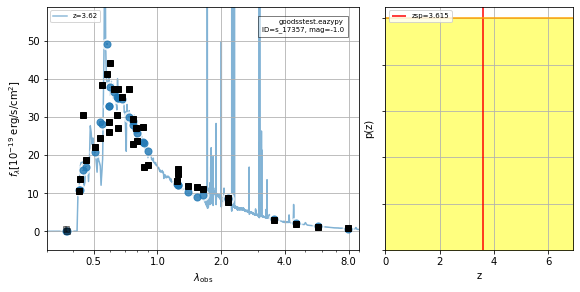

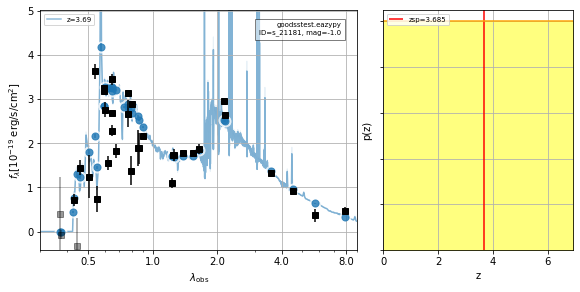

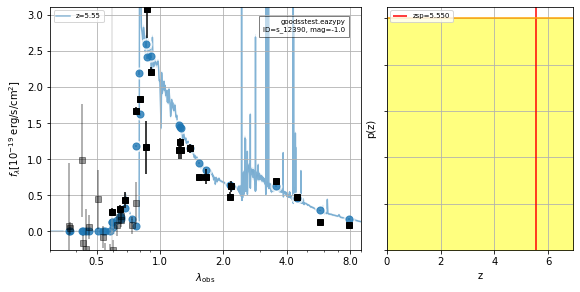

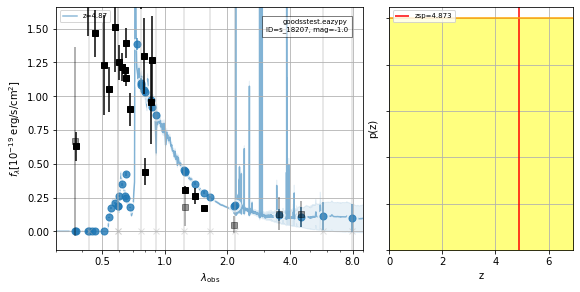

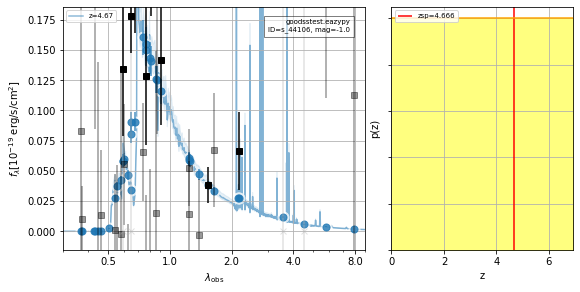

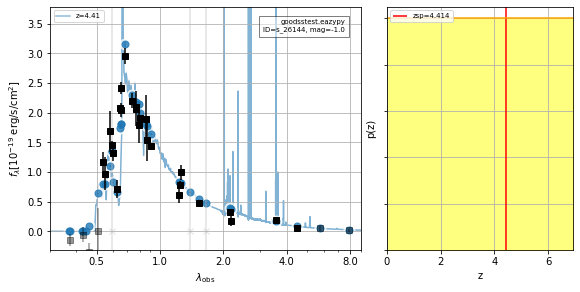

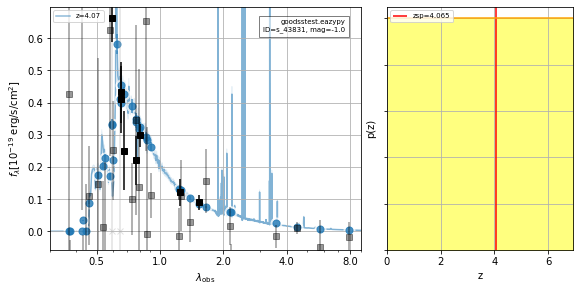

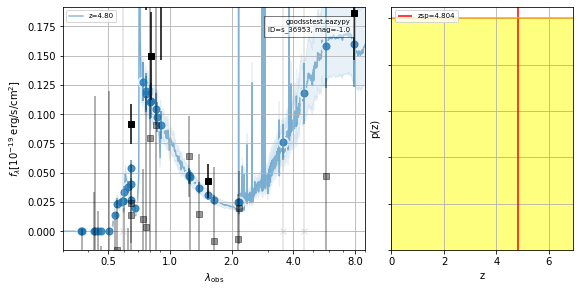

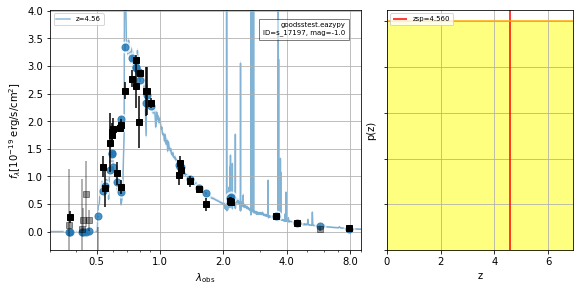

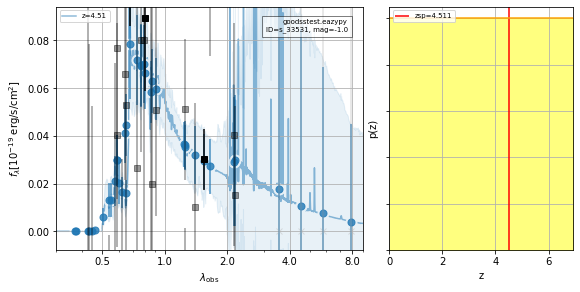

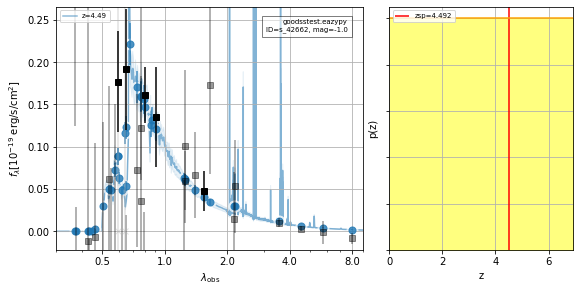

In [19]:
# Turn off error corrections derived above
self.efnu = self.efnu_orig*1 # don't add systematic error

# Full catalog
sample = np.isfinite(self.cat['z_spec'])

# self.fit_parallel(self.idx[sample], n_proc=8)
self.fit_at_zbest(zbest=input_table['z_spec'])

goodss = Table.read('/Users/meghanakilli/src/eazy-py/goodss.cat', format='ascii')
selection = goodss['lya'] == 'y'
lya = goodss['id'][selection]

for i in range(len(self.cat)):
    if self.cat['id'][i] in lya:
        self.show_fit(self.cat['id'][i])

pz_percentiles: No objects in selection


/Users/meghanakilli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ValueError: Axis limits cannot be NaN or Inf

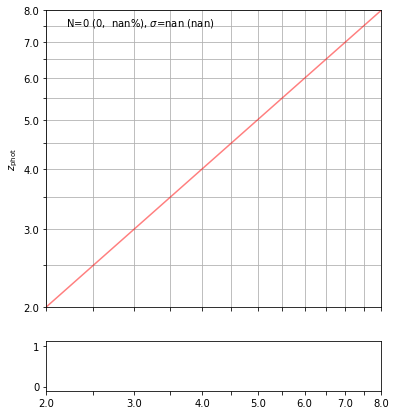

In [7]:
# Show zspec-zphot comparison
fig = self.zphot_zspec(zmin=2,zmax=8)

## Output Table

In [10]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
zout, hdu = self.standard_output(zbest = input_table['z_spec'], rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True) #zbest=column from catalog - from lya fit

# zout, hdu =  self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)
# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits
#zout has stellar masses, sfr
zout.write('/Users/meghanakilli/src/eazy-py/zout_goodss.fits', format = 'fits', overwrite = True)

Get best fit coeffs & best redshifts
compute_lnp (Wed Mar 17 18:46:33 2021)
 ... tef_lnp
 ... full_logprior
 ... beta lnp_beta
fit_best: 0.4 s (n_proc=1,  NOBJ=550)
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
 ... Physical quantities directly from coeffs and templates (1.0 solLum / Hz)
 ... Get uncertainties
Abs Mag filters [271, 272, 274]
Rest-frame filters: [271, 272, 274]


In [11]:
help(self.standard_output)

Help on method standard_output in module eazy.photoz:

standard_output(zbest=None, prior=True, beta_prior=False, UBVJ=[153, 154, 155, 161], extra_rf_filters=[270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163], cosmology=None, LIR_wave=[8, 1000], rf_pad_width=0.5, rf_max_err=0.5, save_fits=True, get_err=True, percentile_limits=[2.5, 16, 50, 84, 97.5], fitter='nnls', n_proc=0, clip_wavelength=1100, absmag_filters=[271, 272, 274], run_find_peaks=False, simple=False) method of eazy.photoz.PhotoZ instance
    SPS output, stellar masses, etc.



# Can start here; no need to run eazy again

In [12]:
output = Table.read(f'/Users/meghanakilli/src/eazy-py/zout_goodss.fits', format = 'fits')
# output.show_in_notebook(display_length=-1)

### Adding lya = y/n column to zout

In [13]:
goodss = Table.read('/Users/meghanakilli/src/eazy-py/goodss.cat', format='ascii')
lyacol = goodss['lya']

#### Only use once; comment out after use

In [14]:
# output.add_column(lyacol, name='lya', index=3)

In [15]:
selection = output['lya'] == f'y'
output[selection].show_in_notebook(display_length=-1)

idx,id,ra,dec,lya,z_spec,nusefilt,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,MLv,Av,mass_p [5],sfr_p [5],Lv_p [5],LIR_p [5],ssfr_p [5],rest270,rest270_err,rest274,rest274_err,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest161,rest161_err,rest162,rest162_err,rest163,rest163_err,DISTMOD,ABSM_271 [5],ABSM_272 [5],ABSM_274 [5]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solMass / solLum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,s_17357,53.174381,-27.867349,y,3.615,38,3686.4,79157.5,3.615,4876.5625,0.016618371,3.5267308,6.0362566e-15,3.5267308,4491.7559,3.5099,3.5166,3.5485,3.5584,3.5624,29.499,0.320,32.268,0.458,33.342,1.298,36.907,0.682,3.2e+04,8.85e+10,229.066,4.68e+11,8.56e+11,0.19,0.23,8.78e+10 .. 8.97e+10,227.617 .. 231.126,4.65e+11 .. 4.72e+11,8.48e+11 .. 8.69e+11,2.57e-09 .. 2.60e-09,12.406,0.021,21.497,0.088,15.978,0.040,15.431,0.094,28.522,0.224,34.702,0.238,39.163,0.995,34.147,0.657,34.088,0.594,36.932,0.828,50.063,0.808,41.295,7.124,45.85016539384688,-23.68777754594649 .. -23.709857013719926,-23.638958957689653 .. -23.66337683488692,-24.170256641405473 .. -24.189696338671098
1,s_21181,53.124366,-27.851628,y,3.685,38,3686.4,79157.5,3.685,1127.265,0.009219442,3.618177,1.3887196e-08,3.618177,1073.4005,3.6045,3.6113,3.6184,3.6254,3.6333,5.520,0.160,10.954,0.330,13.709,0.700,15.882,2.373,3.3e+04,1.02e+11,48.026,1.77e+11,2.53e+11,0.58,0.27,9.46e+10 .. 1.11e+11,25.311 .. 68.288,1.73e+11 .. 1.83e+11,1.22e+11 .. 3.71e+11,2.28e-10 .. 7.22e-10,1.089,0.014,2.612,0.056,1.437,0.024,1.868,0.046,5.015,0.230,11.873,0.480,14.286,0.337,15.452,0.225,16.359,0.336,16.301,2.203,24.289,4.303,22.882,4.594,45.883420048212805,-21.441592274164954 .. -21.481471119379798,-21.406035480952063 .. -21.537961063837805,-21.885781345820227 .. -21.968989429926673
2,s_12390,53.078812,-27.884096,y,5.55,37,3686.4,79157.5,5.55,331.53525,0.023837492,5.4237366,0.0014566139,5.4237366,195.0081,5.3459,5.3835,5.4049,5.4191,5.4315,3.061,0.264,6.184,0.158,8.059,0.186,4.618,0.914,5.3e+04,1.06e+11,34.321,1.86e+11,7.27e+10,0.57,0.10,9.97e+10 .. 1.37e+11,33.362 .. 35.237,1.81e+11 .. 2.25e+11,7.16e+10 .. 7.61e+10,2.50e-10 .. 3.43e-10,1.783,0.039,1.987,0.380,1.741,0.037,1.741,0.052,2.869,0.237,7.131,0.495,8.606,0.165,8.261,0.295,4.825,0.569,4.695,0.947,4.460,0.904,3.455,0.943,46.56829315405581,-22.10358673315737 .. -22.255133211428856,-22.108063280398582 .. -22.219732820803856,-21.740912020022606 .. -22.60142952185366
3,s_18207,53.270004,-27.861221,y,4.873,28,3686.4,45020.3,4.873,1242.8635,0.9987713,0.09417428,0.020963818,0.10517092,167.4461,0.0528,0.0674,0.0969,0.1148,0.1513,0.442,0.110,0.608,0.227,0.857,0.391,7.731,8.618,4.5e+04,2.17e+11,9.782,2.38e+10,7.02e+10,9.13,1.48,2.21e+09 .. 6.21e+11,9.231 .. 10.378,1.81e+10 .. 3.43e+10,1.63e+10 .. 1.71e+11,1.65e-11 .. 4.30e-09,0.644,0.043,0.383,0.029,0.509,0.039,0.403,0.026,0.436,0.084,0.636,0.230,1.252,0.606,2.360,1.355,4.682,2.581,7.609,9.196,13.636,22.516,11.629,25.405,46.355916763238845,-20.312738204889236 .. -20.684957290582595,-20.204944396905837 .. -20.528611923150955,-20.16442468255037 .. -20.457378173761306
4,s_44106,53.169462,-27.765576,y,4.666,36,3686.4,79157.5,4.666,92.92387,0.024593482,4.5289617,0.0025161281,4.5289617,83.4757,4.4681,4.5029,4.5428,4.5798,4.6219,0.079,0.060,0.068,0.063,0.091,0.149,30.287,66.715,4.3e+04,2.84e+08,1.221,2.32e+09,2.10e+09,0.12,0.07,2.26e+08 .. 3.42e+08,0.972 .. 1.471,1.85e+09 .. 2.80e+09,1.67e+09 .. 2.53e+09,4.30e-09 .. 4.30e-09,0.084,0.010,0.054,0.024,0.079,0.009,0.051,0.015,0.082,0.055,0.080,0.057,0.032,0.187,3.058,13.270,4.281,24.791,25.877,65.263,37.204,81.498,18.696,92.725,46.28398349893347,-18.048387795808473 .. -18.721735268953005,-16.947069436433473 .. -18.48675373208777,-16.760900765779176 .. -18.710375100495973
5,s_26144

## UVJ

Text(0, 0.5, '$(U-V)_0$')

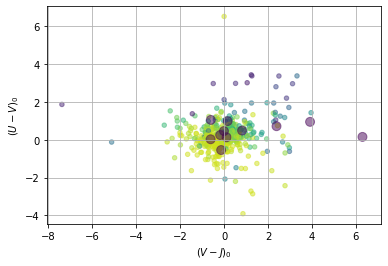

In [14]:
# Show UVJ diagram
lya_sel = output['lya'] == 'y'
nolya_sel = output['lya'] == 'n'

uv = -2.5*np.log10(output['restU']/output['restV'])
vj = -2.5*np.log10(output['restV']/output['restJ'])
ssfr = output['sfr']/output['mass'] #sfr not SFR - what does this mean??

# sel = (output['z_phot'] > 0.2) & (output['z_phot'] < 1)
plt.scatter(vj[nolya_sel], uv[nolya_sel], c=np.log10(ssfr[nolya_sel]), s=20, vmin=-13, vmax=-8, alpha=0.5)
plt.scatter(vj[lya_sel], uv[lya_sel], c=2*np.log10(ssfr[lya_sel]), s=80, vmin=-13, vmax=-8, alpha=0.5) # ssfr color not accurate because of the 2*

# plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4);
plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')

In [15]:
print(output[lya_sel]['id','restU','restV','restJ','z_phot','z_spec'])
uv = -2.5*np.log10(output[lya_sel]['restU']/output[lya_sel]['restV'])
vj = -2.5*np.log10(output[lya_sel]['restV']/output[lya_sel]['restJ'])
vj

   id      restU        restV        restJ     z_phot z_spec
------- ------------ ------------ ------------ ------ ------
s_17357       29.499       33.342       36.907  3.615  3.615
s_21181        5.520       13.709       15.882  3.685  3.685
s_12390        3.061        8.059        4.618   5.55   5.55
s_18207        0.442        0.857        7.731  4.873  4.873
s_44106        0.079        0.091       30.287  4.666  4.666
s_26144        1.126        1.418        1.202  4.414  4.414
s_43831        0.136        0.083        0.073  4.065  4.065
s_36953        0.090        0.215        7.927  4.804  4.804
s_17197        1.911        2.921        2.904   4.56   4.56
s_33531        0.111        0.174        0.370  4.511  4.511
s_42662        0.088        0.090        0.051  4.492  4.492


0.110
0.160
-0.605
2.388
6.303
-0.180
-0.135
3.916
-0.006
0.818
-0.613


# Main sequence plot

/Users/meghanakilli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


Text(0, 0.5, 'sfr')

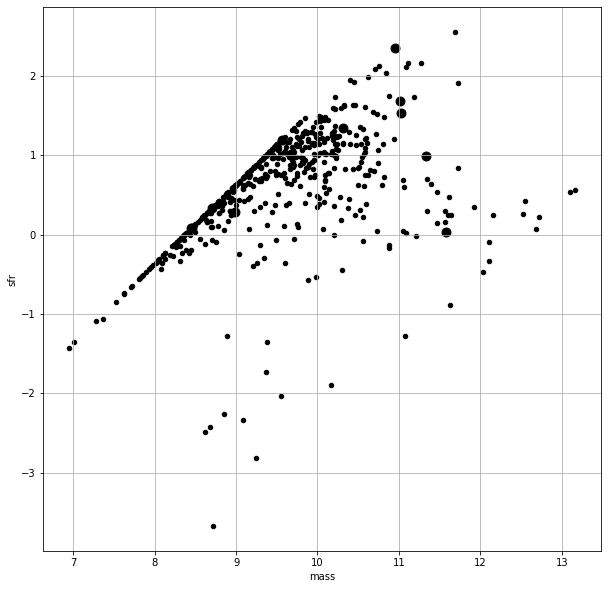

In [16]:
plt.figure(figsize=(10,10))


bins = np.linspace(0, 1, 10)
digitized = np.digitize(output['z_spec'], bins)
color = [output['z_spec'][digitized == i].mean() for i in range(1, len(bins))]

plt.scatter(np.log10(output['mass'][nolya_sel]), np.log10(output['sfr'][nolya_sel]), c='black', s=20, vmin=-13, vmax=-8)#, alpha=0.8)
plt.scatter(np.log10(output['mass'][lya_sel]), np.log10(output['sfr'][lya_sel]), c='black', s=80, vmin=-13, vmax=-8)#, alpha=0.8)

# plt.xlim(8.8, 11.8); plt.ylim(-0.2,2.8);
plt.grid()
plt.xlabel('mass'); plt.ylabel('sfr')
# plt.axis('off')
# plt.savefig('/Users/meghanakilli/src/eazy-py/msplot.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400, overwrite=True)

In [26]:
np.histogram(output['z_spec'], bins=10)

(array([ 56,   0,   4,   0,   0,  57, 213, 144,  56,  20]),
 array([-1.        , -0.23000002,  0.53999996,  1.30999994,  2.07999992,
         2.8499999 ,  3.61999989,  4.38999987,  5.15999985,  5.92999983,
         6.69999981]))

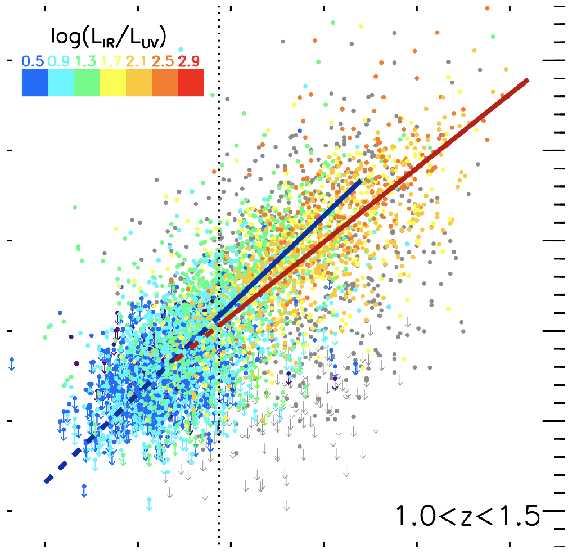

In [24]:
whitaker = mpimg.imread('/Users/meghanakilli/src/eazy-py/whitaker.png')
plt.figure(figsize=(10, 10))
plt.imshow(whitaker)
plt.axis('off')
plt.savefig('/Users/meghanakilli/src/eazy-py/whitaker.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400, overwrite=True) # overwrite with required resolution

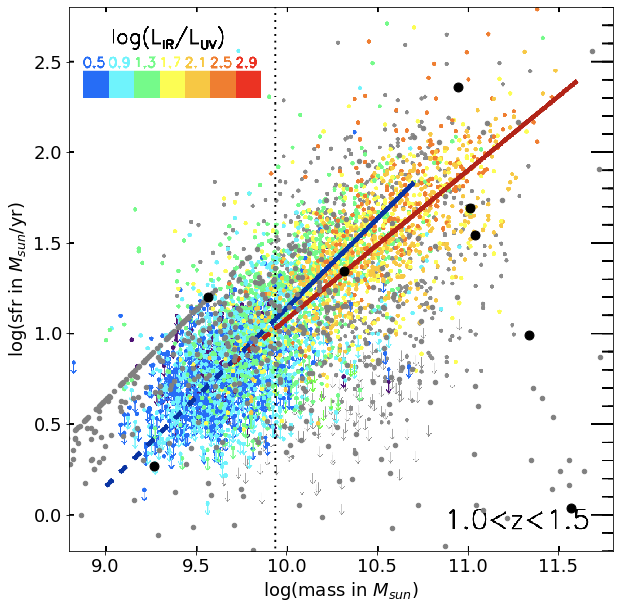

In [25]:
plt.figure(figsize=(10, 10))
whitaker = mpimg.imread('/Users/meghanakilli/src/eazy-py/whitaker.png')
plt.imshow(whitaker, extent = [8.8, 11.8, -0.2, 2.8])

plt.scatter(np.log10(output['mass'][nolya_sel]), np.log10(output['sfr'][nolya_sel]), c='grey', s=20, vmin=-13, vmax=-8)#, alpha=0.8)
plt.scatter(np.log10(output['mass'][lya_sel]), np.log10(output['sfr'][lya_sel]), c='black', s=80, vmin=-13, vmax=-8)#, alpha=0.8)
plt.xlim(8.8, 11.8); plt.ylim(-0.2,2.8);
plt.xlabel(r'log(mass in $M_{sun}$)', fontsize = 18)
plt.ylabel(r'log(sfr in $M_{sun}$/yr)', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [63]:
help(self.show_fit) #for data get_spec=True

Help on method show_fit in module eazy.photoz:

show_fit(id, show_fnu=False, xlim=[0.3, 9], get_spec=False, id_is_idx=False, show_components=False, show_redshift_draws=False, zshow=None, ds9=None, ds9_sky=True, add_label=True, showpz=0.6, logpz=False, zr=None, axes=None, template_color='#1f77b4', figsize=[8, 4], NDRAW=100, fitter='nnls', show_missing=True, maglim=None, show_prior=False, show_stars=False, delta_chi2_stars=0) method of eazy.photoz.PhotoZ instance
    Show SED and p(z) of a single object
    
    Parameters
    ----------
    id : int
        Object ID corresponding to columns in `self.cat['id']`.  Or if
        `id_is_idx` is set to True, then is zero-index of the desired 
        object in the catalog array.
    
    show_fnu : bool, int
        If False, then make plots in f-lambda units of 1e-19 erg/s/cm2/A.
        
        If `show_fnu == 1`, then plot f-nu units of micro-Jansky
        
        If `show_fnu == 2`, then plot "nu-Fnu" units of micro-Jansky/micron.
  

## SED

### Eazy z

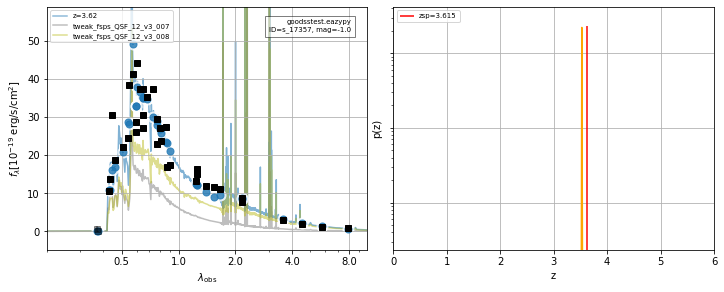

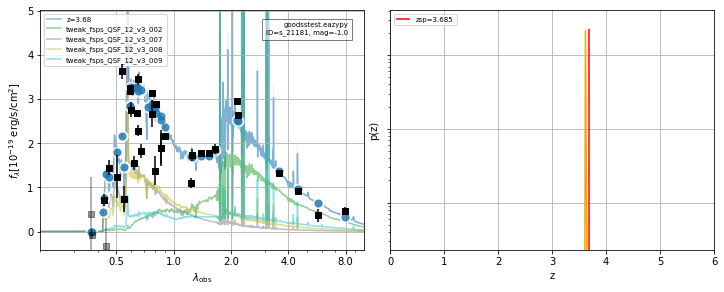

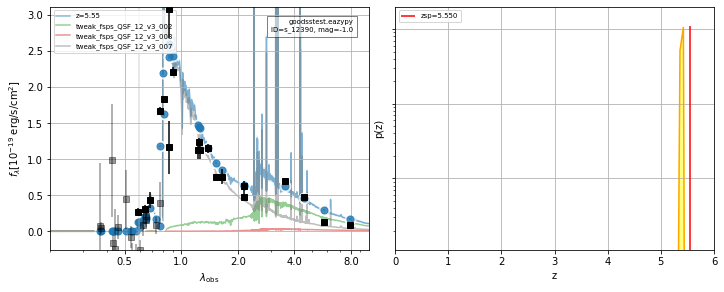

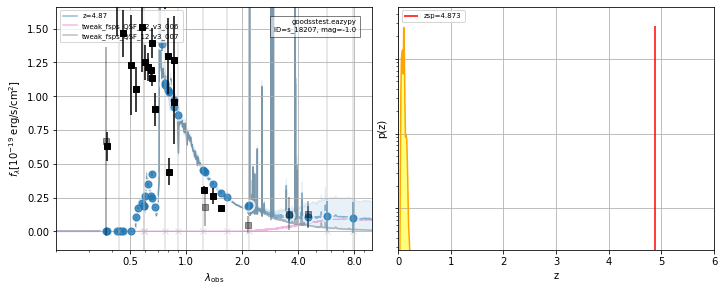

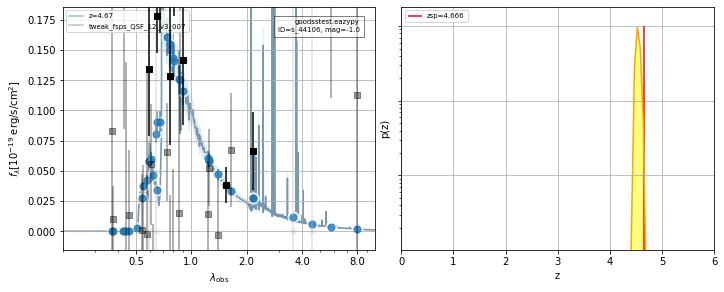

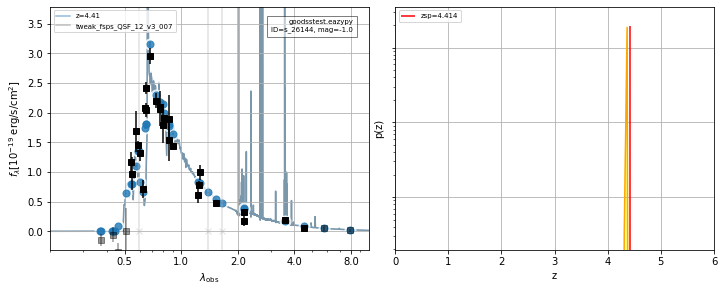

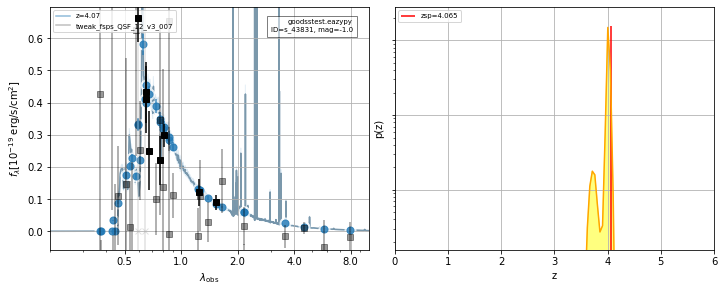

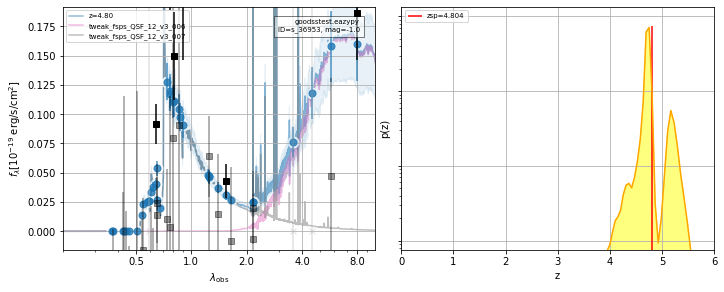

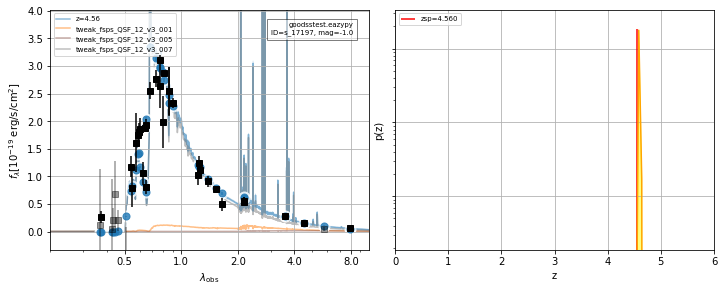

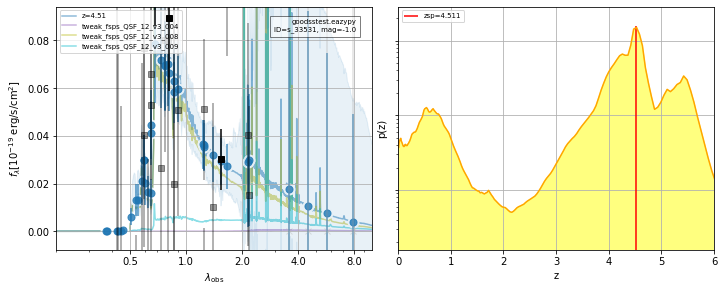

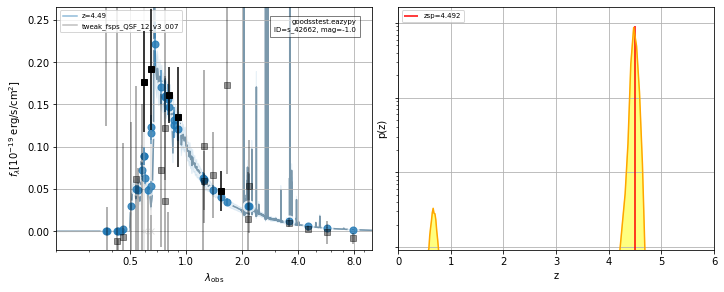

In [16]:
# Show brightest objects #with z_spec > 1
imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat['f_F814Wcand'])#['f_f814w'])
# sel = (self.cat['z_spec'] > 1.1)

so = np.argsort(imag)#[sel])
ids = output[selection]['id']
# ids = self.cat['id'][so]#[sel]

for i in range(len(ids)):
#     sel = zout['id'] == ids[i]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 10], show_components=True, showpz=True,
                              logpz=True, zr=[0,6], figsize=[10,4]) #showpz=True => z fit plots
    fig.savefig(f'/Users/meghanakilli/src/eazy-py/eazy_seds/{ids[i]}_eazy.png', dpi = 200, overwrite=True)

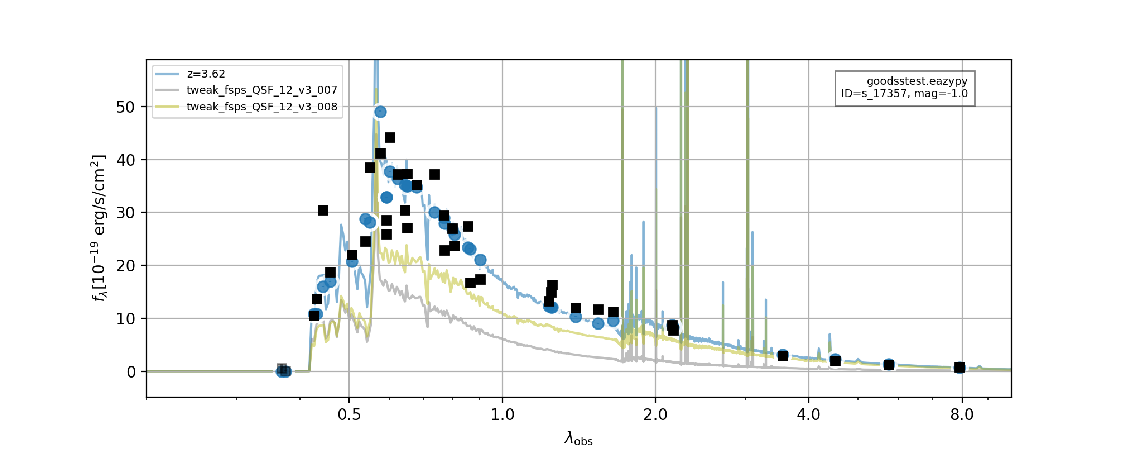

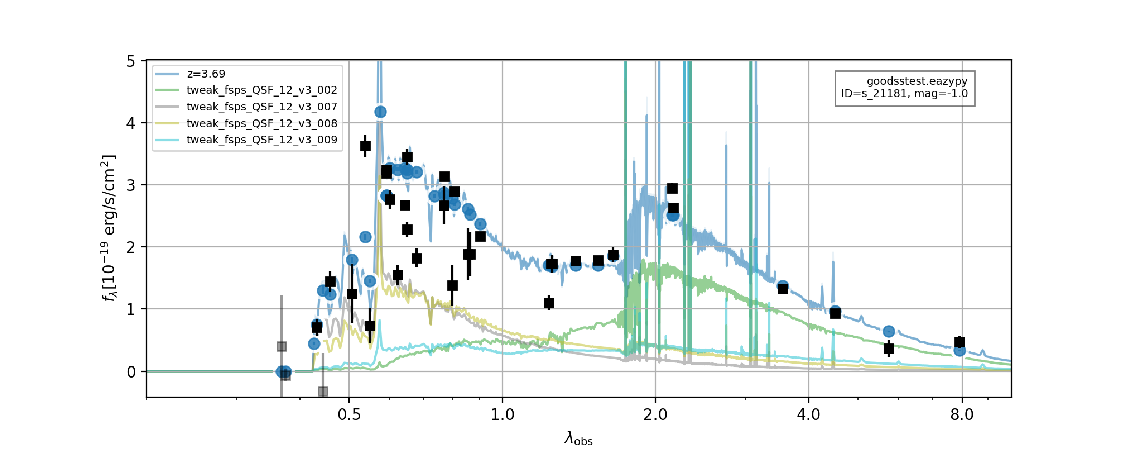

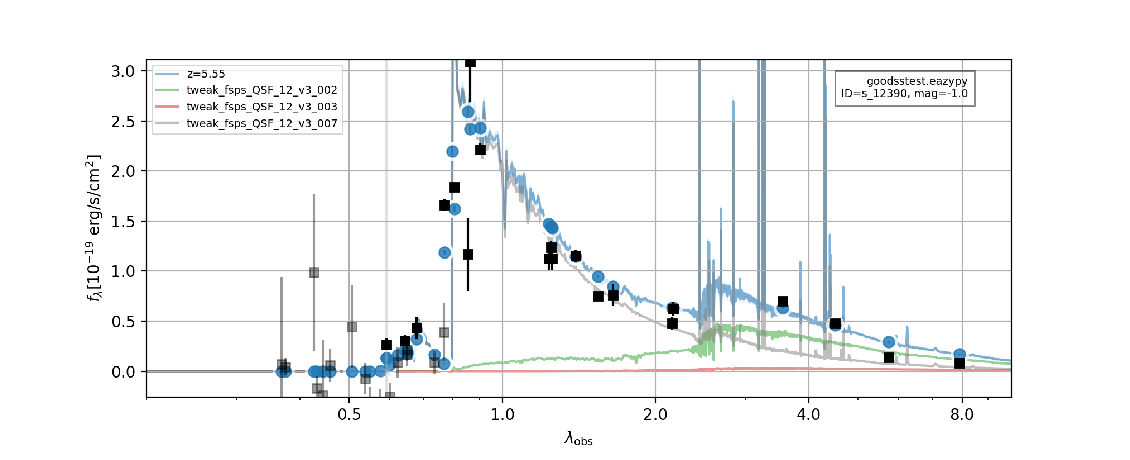

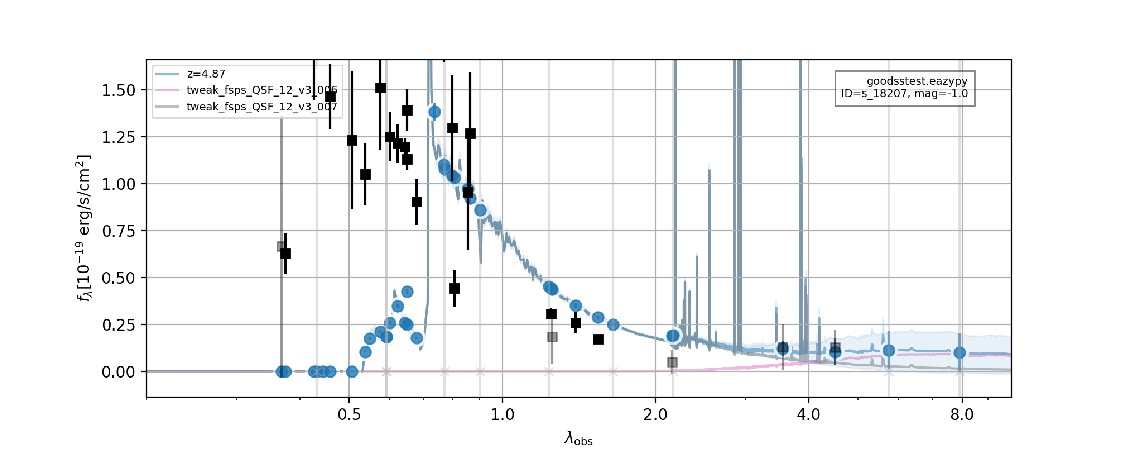

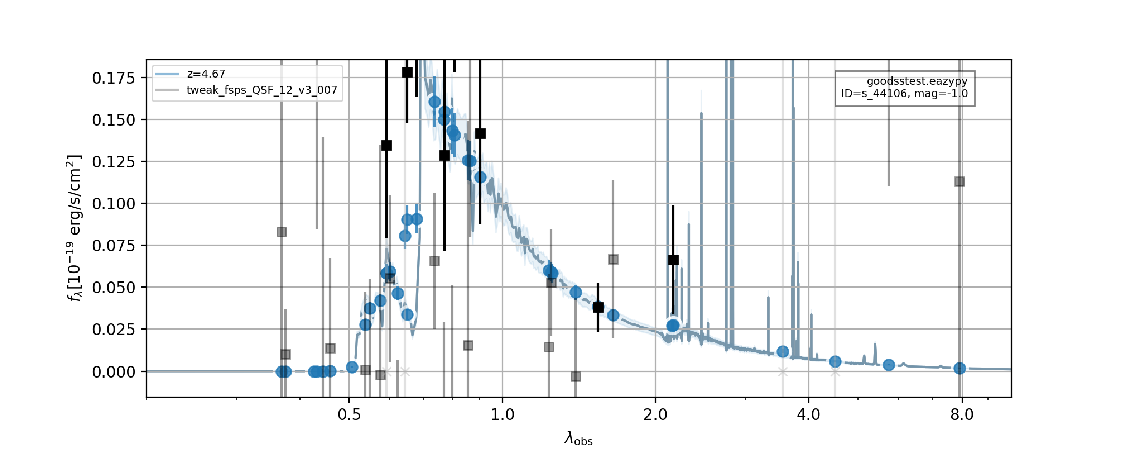

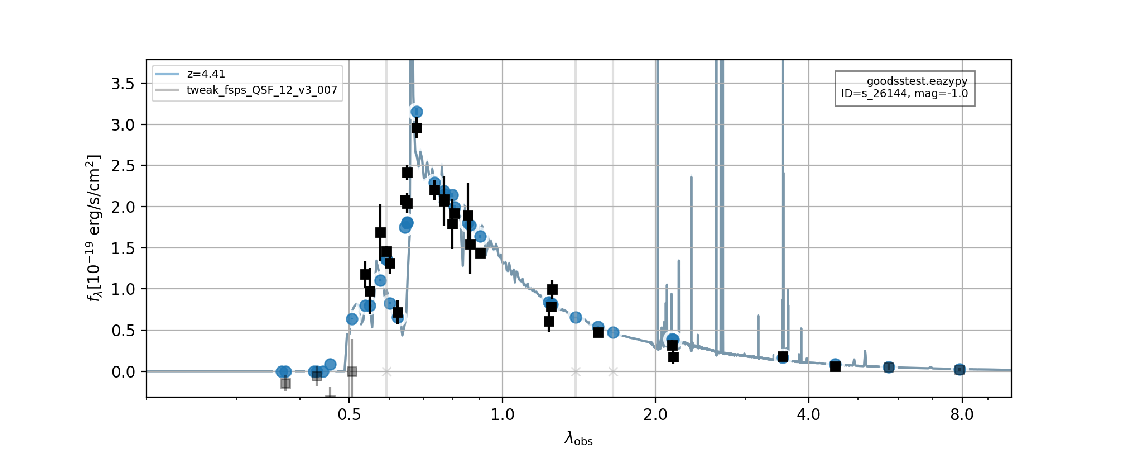

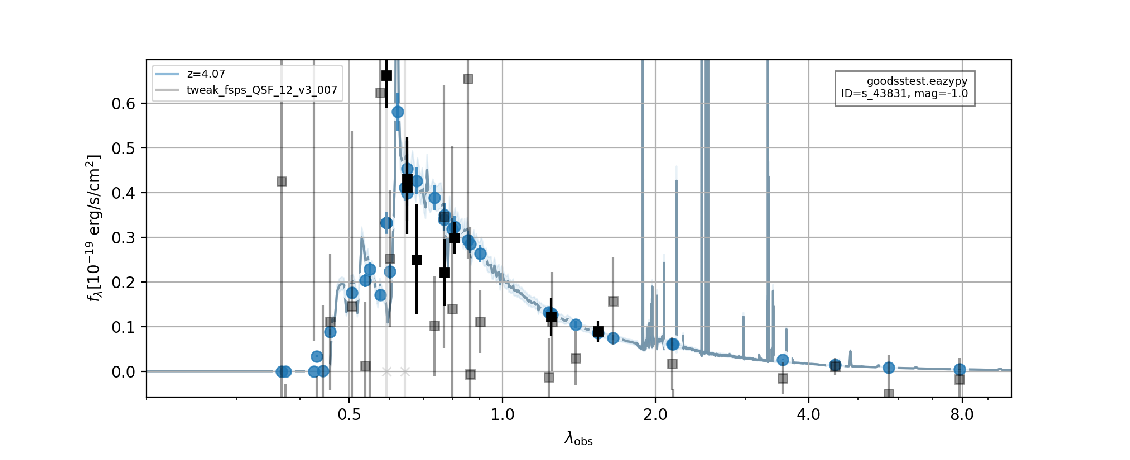

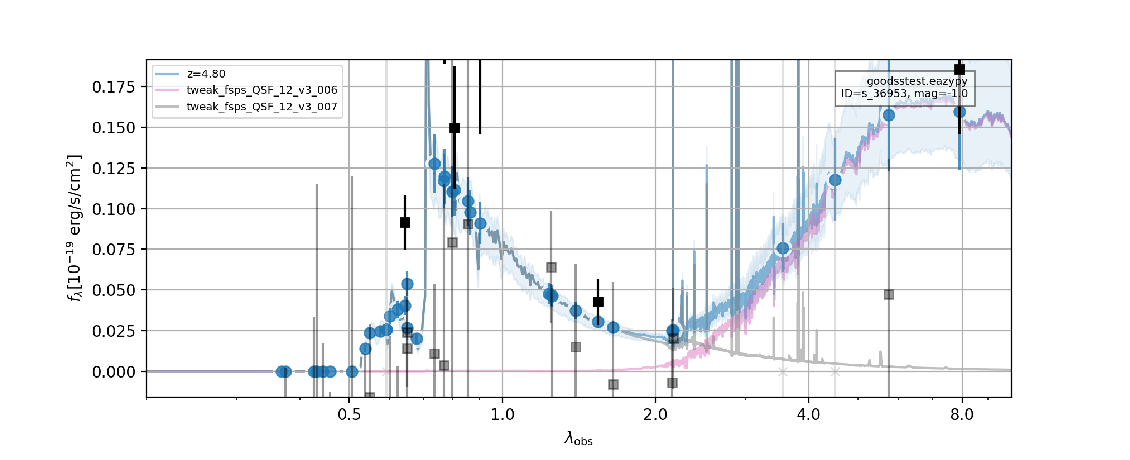

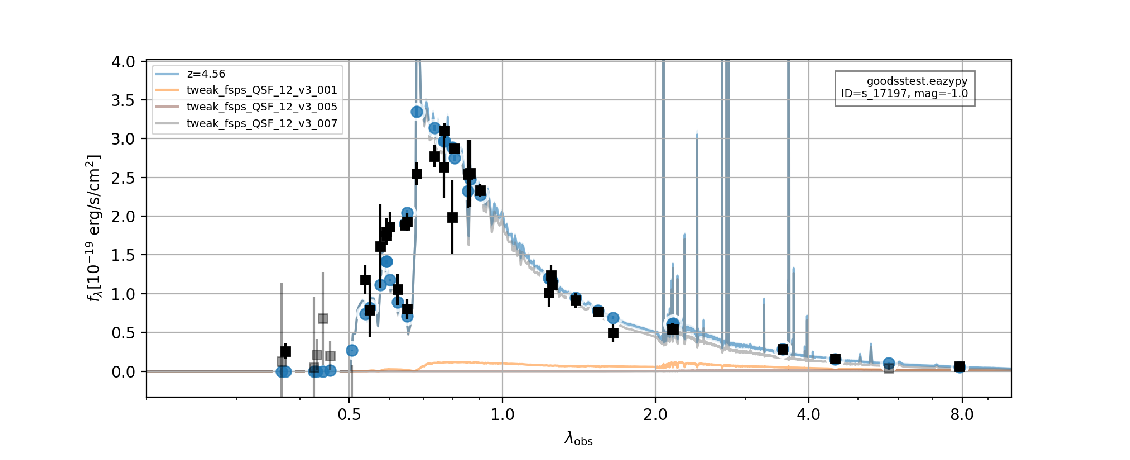

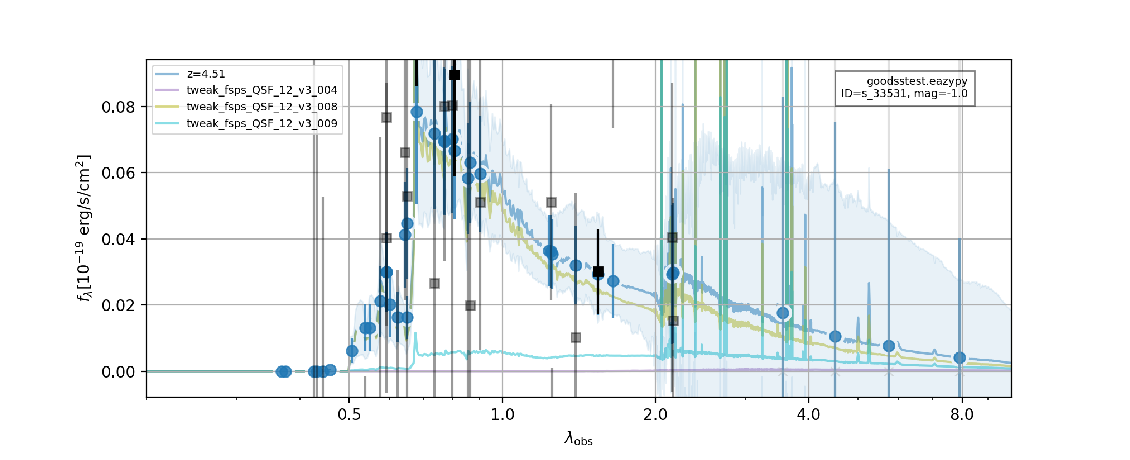

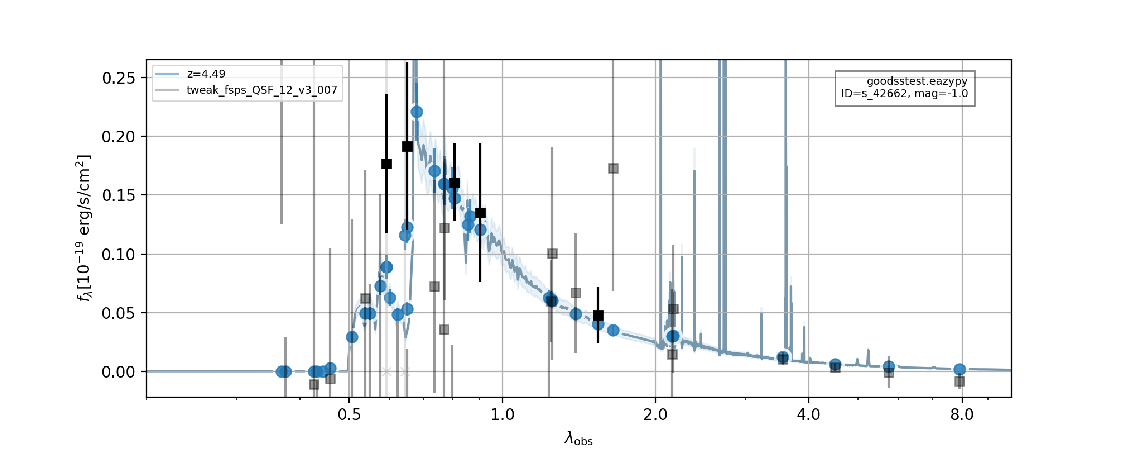

In [21]:
ids = output[selection]['id']
for i in range(len(ids)):
    img = mpimg.imread(f'/Users/meghanakilli/src/eazy-py/eazy_seds/{ids[i]}_eazy.png')
    plt.figure(figsize=(20, 10))
    plt.imshow(img)    
    plt.axis('off')
    plt.show()

### Force-fit at grism z

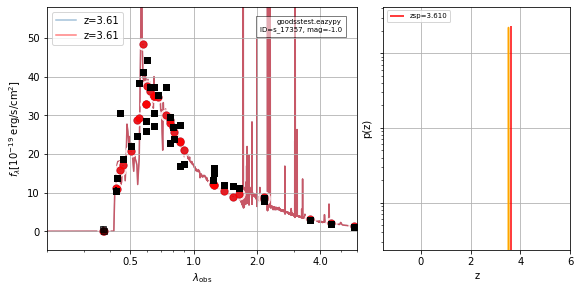

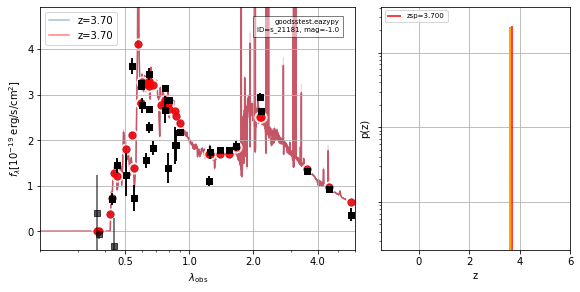

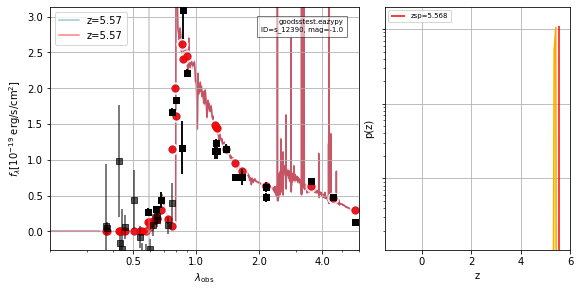

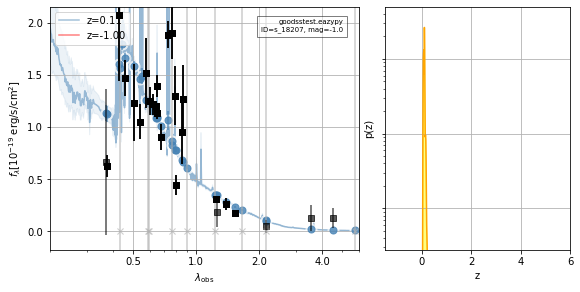

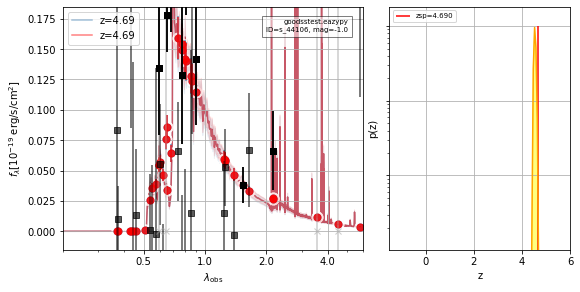

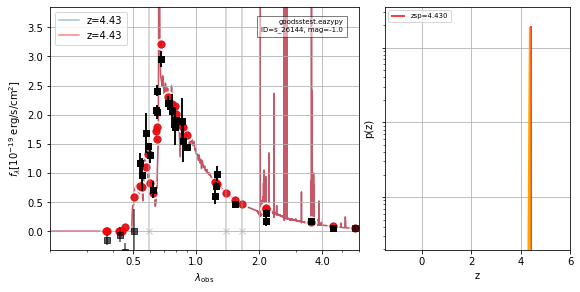

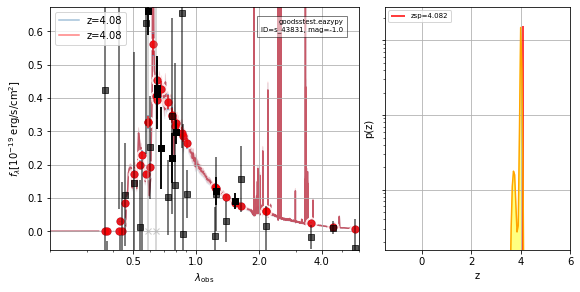

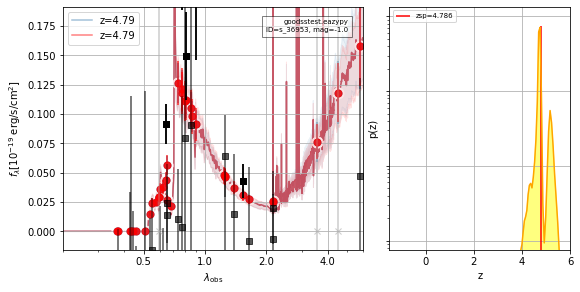

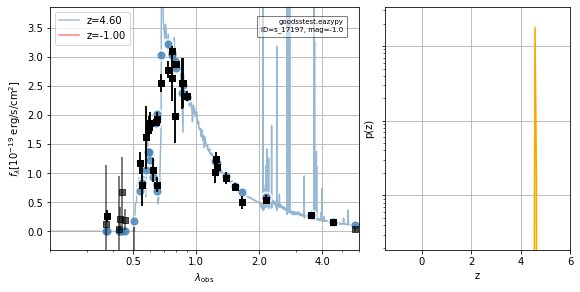

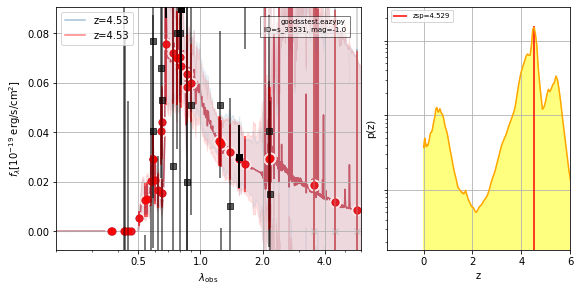

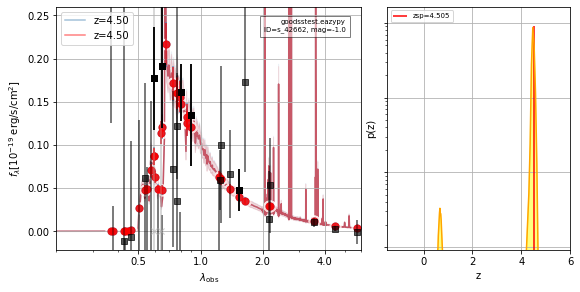

In [23]:
# Compare forced fit at z_spec
for i in range(len(ids)):
    ix = np.where(self.cat['id'] == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 6], 
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[-1.5,6], figsize=[8,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 6], axes=axes,
                        zshow=self.cat['z_spec'][ix], 
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')
    fig.savefig(f'/Users/meghanakilli/src/eazy-py/eazy_seds/{ids[i]}_eazy2.png', dpi = 400, overwrite=True)